# Introduction

As the date for FIFA 21 release ever gets closer, it is time to analyse the various footballing players to understand how should we select our FUT team for online play against rivals. 

This particular notebook will utilise the latest version FIFA 20 player database for it's analysis. Through this particular analysis, we will try to understand how the overall ratings of various footballers are generally distributed. We will try to check the top players as well as the top mid range players in our analysis below.

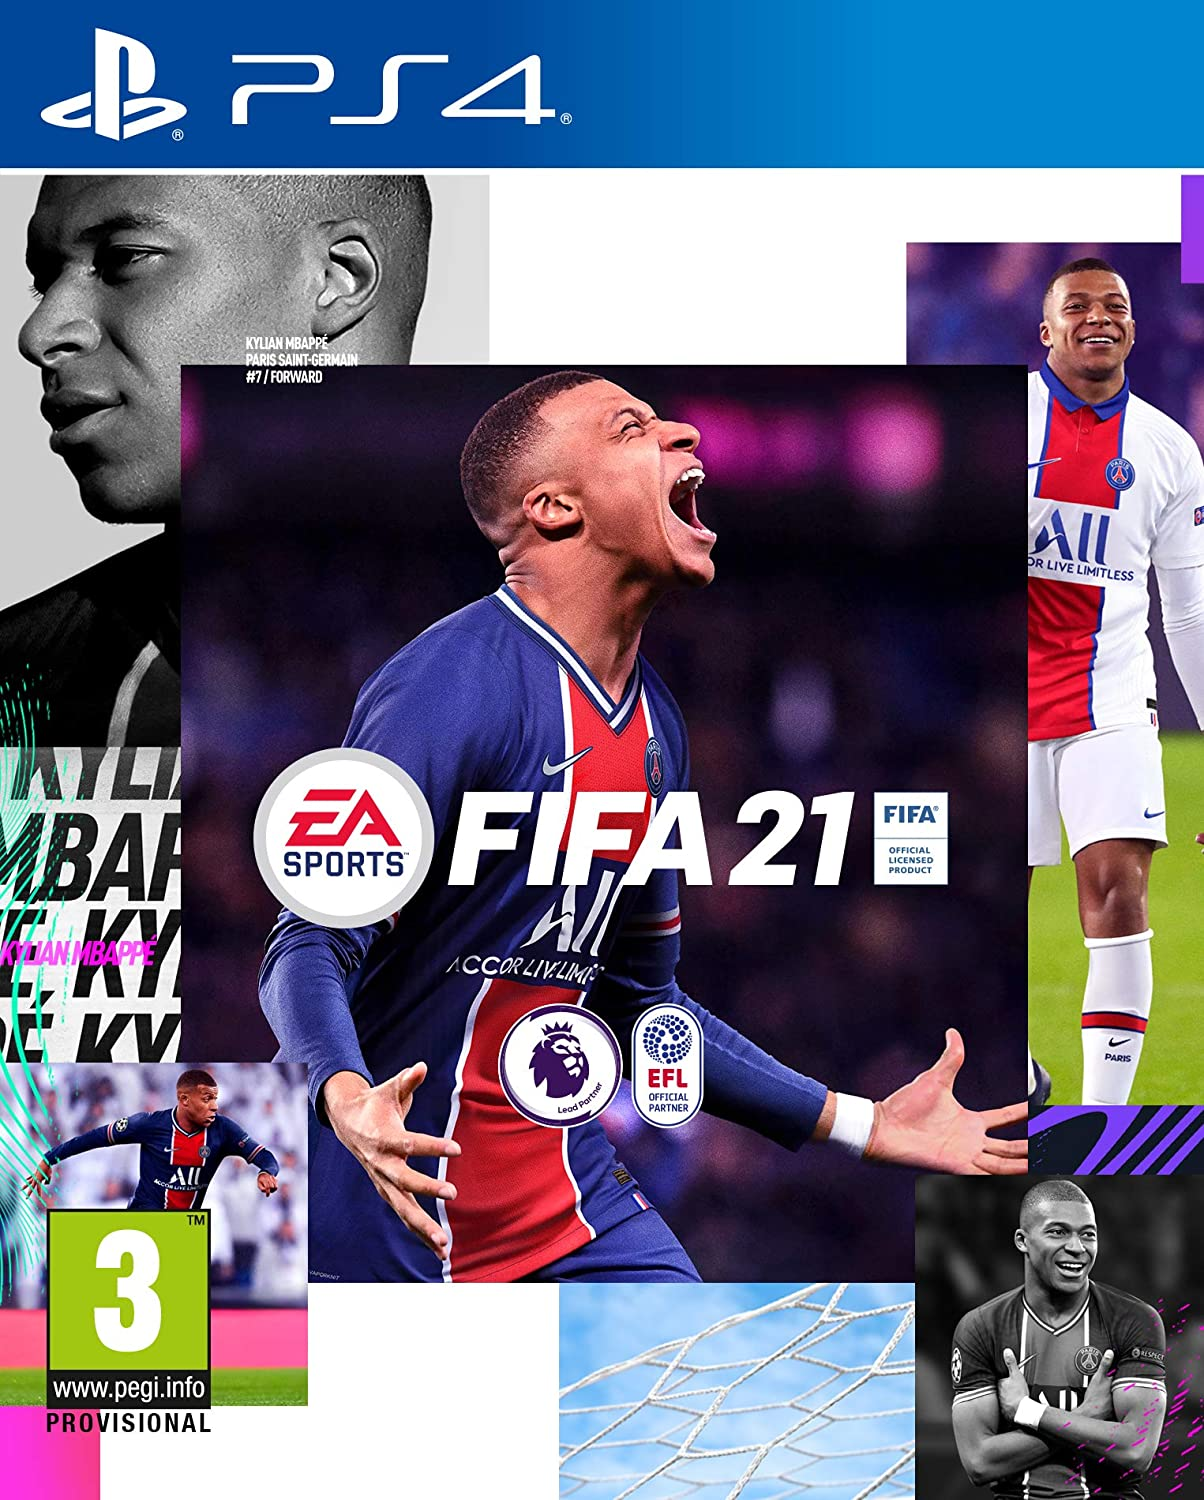


# Importing the libraries and datasets

Let us start off with importing the required datasets and libraries necessary for our data analysis

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly
plotly.offline.init_notebook_mode (connected = True)

In [ ]:
pd.set_option('display.max_columns',None)
df=pd.read_csv('../input/fifa-20-complete-player-dataset/players_20.csv')
df.head()

# Data Wrangling

As we can clearly see, there are many columns with null values. Let us first check which columns have null values with them and try to take care of these accordingly.

In [ ]:
df.isna().any().value_counts()

48 columns have null values associated with them while 56 columns have no null values. Let us visualise the density of these null values in each column.

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),cmap='viridis')

We see that columns such as gk_kicking, gk_positioning, etc have very high number of null values. This is expected because only a small percent of players are goal keepers.

Considering the fact that most null values actually mean that the player score for that feature is 0, we will try to fill all the null values with 0s.

In [ ]:
df.info()

In [ ]:
df.fillna(0,inplace=True)

# Data Visualisation

Let us move ahead with the most important aspect which is the data visualisation section of the FIFA 20 dataset.


## Preferred foot

Firstly, let us check how many players are left or right footed through a pie chart.

In [ ]:
df['Count']=1
df_foot=df.groupby('preferred_foot')['Count'].sum().reset_index()

fig=px.pie(df_foot,values='Count',names='preferred_foot',hole=0.4)
fig.update_layout(title='Distribution of preferred foot of FIFA players',title_x=0.5,
                  annotations=[dict(text='Foot',font_size=20, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent+label')
fig.show()

As we can see, right footed players are far more common as compared to left footed players. Nearly 77 % of players are right footed.

## Age

Let us see the age distribution of the players in the FIFA dataset find the mean age of the players across all the leagues.

In [ ]:
plt.figure(figsize=(10,8))
sns.kdeplot(df['age'],shade=True)
plt.title('Age distribution of players',size=25)
plt.axvline(df['age'].mean(),color='red')
plt.xlabel('Mean age:{0:.0f}'.format(df['age'].mean()),size=20)

Mean age of all the players in the dataset is 25 . As we can see, players above 35 are much lower and many players start their professional contracts at 18. Hence, the distribution is shown as such.


## Players by nationality

Let us see the top 10 nations with highest number of players in the professional category. This indicates how strong the football academy is in the nations to provide the exposure to these footballers to play for the various clubs at a professional level.

In [ ]:
df_nation=df.groupby('nationality')['Count'].sum().reset_index().sort_values(by='Count',ascending=False).head(10)

In [ ]:
sns.catplot('nationality','Count',data=df_nation,kind='bar',height=8,aspect=2)
plt.xticks(size=15,rotation=45)
plt.xlabel('Nationality',size=20)
plt.yticks(size=15)
plt.title('Number of professional footballers of each nation',size=25)

From the above plot, we see that most of the professional footballers are the European nations. Remaining ones in the top 10 are either South American or Asian. 


## Top 10 clubs with most valuable squad

Let us check the clubs with the most valuable squad according to their current market values.

In [ ]:
df_val=df.groupby('club')['value_eur'].sum().reset_index().sort_values(by='value_eur',ascending=False).head(10)

In [ ]:
sns.catplot('club','value_eur',data=df_val,kind='bar',height=8,aspect=2,palette='coolwarm_r')
plt.xticks(size=15,rotation=45)
plt.xlabel('Club name',size=20)
plt.yticks(size=15)
plt.title('Squad value',size=25)
plt.ylabel('Squad value (X 100 Million Euros)',size=15)

As we can see from the graph above, **Real Madrid has the most expensive squad in the world with nearly 860 Million Euros** worth players. followed by FC Barcelona and Manchester City.


## Top 10 clubs with highest potential players

Let us check which clubs have players with the highest cumulative potential. This would tell us how strong the current squads of each club are since price isn't a definitive factor of performance.

In [ ]:
df_pot=df.groupby('club')['potential'].sum().reset_index().sort_values(by='potential',ascending=False).head(10)

In [ ]:
sns.catplot('club','potential',data=df_pot,kind='bar',height=8,aspect=2,palette='winter')
plt.xticks(size=15,rotation=45)
plt.xlabel('Club name',size=20)
plt.yticks(size=15)
plt.title('Potential of the squads',size=25)
plt.ylabel('Squad potential)',size=15)

In terms of cumulative potential of the squds, all the top 10 clubs are extremely close to each other. However, FC Barcelona just edges past Real Madrid.

Now that we have checked the stats of all the clubs, let us take a deeper look at the individual players and their attributes.

## Player value distribution

As we know, not all players have extremely high values. Through a distribution plot, we would like to know what ranges of values are the highest.

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(df['value_eur'])
plt.title('Player value distribution',size=25)
plt.xlabel('Player value in Euros (X 100 million)',size=15)

Hence, in the FIFA player dataset, we see that maximum number of players have a value of worth 0-20 million Euros. There are a few players on the extreme end as well with values above 100 million euros. These are generally the big signings or the extremely promising players (Eg: Mbappe)


## Player wage distribution

As per the value of the player in a squad, footballers are generally paid. Hence, we will see how the wages are being distributed.

In [ ]:
sns.set()
plt.figure(figsize=(10,8))
sns.kdeplot(df['wage_eur'],shade=True,color='green')
plt.title('Player wages distribution',size=25)
plt.xlabel('Player wage in Euros',size=15)

## Top 10 players in the world

Let us check the top 10 players based on FIFA ratings

In [ ]:
df_top10=df.sort_values(by='overall',ascending=False).head(10)

In [ ]:
sns.catplot('short_name','overall',data=df_top10,kind='point',height=8,aspect=2)
plt.xlabel('\n Name of players',size=20)

plt.ylabel('Overall',size=15)
plt.title('Top 10 players worldwide',size=25)
plt.xticks(size=15)

## Top 10 Young players

Let us check the top 10 young players. For this particular analysis, we will consider players of ages 23 or below only.

In [ ]:
df_young=df[df['age']<24]
df_young_top10=df_young.sort_values(by='overall',ascending=False).head(10)

In [ ]:
sns.catplot('short_name','overall',data=df_young_top10,kind='point',height=8,aspect=2,color='seagreen')
plt.xlabel('\n Name of players',size=20)

plt.ylabel('Overall',size=15)
plt.title('Top 10 young players worldwide',size=25)
plt.xticks(size=15)

As we can see, K. Mbappé leads the list of young top 10 players in the world.


## Top 10 Goalkeepers

As goalkeepers are an integral part of any squad, it important to know which are the top 10 goalkeepers right now in the world.

In [ ]:
df_gk=df[df['team_position']=='GK']
df_gk_top10=df_gk.sort_values(by='overall',ascending=False).head(10)

In [ ]:
sns.catplot('short_name','overall',data=df_gk_top10,kind='point',height=8,aspect=2,color='indianred')
plt.xlabel('\n Name of players',size=20)

plt.ylabel('Overall',size=15)
plt.title('Top 10 Goalkeepers worldwide',size=25)
plt.xticks(size=15)

We can see that Oblak leads the list of top 10 goalkeepers in the world.

## Top 10 Free kick specialists

Let us check the top 10 FK specialists based on FK accuracy.

In [ ]:
df_fk_top10=df.sort_values(by='skill_fk_accuracy',ascending=False).head(10)
sns.catplot('short_name','skill_fk_accuracy',data=df_fk_top10,kind='point',height=8,aspect=2,color='green')
plt.xlabel('\n Name of players',size=20)

plt.ylabel('Overall',size=15)
plt.title('Top 10 FK specialists worldwide',size=25)
plt.xticks(size=15,rotation=45)

As we can see, Leo Messi leads the list of top free kick takers.

## Top 10 defenders worldwide


Let us check the top 10 defenders in the world currently.

In [ ]:
df_def_top10=df.sort_values(by='defending',ascending=False).head(10)
sns.catplot('short_name','defending',data=df_def_top10,kind='point',height=8,aspect=2,color='blue')
plt.xlabel('\n Name of players',size=20)

plt.ylabel('Overall',size=15)
plt.title('Top 10 defenders worldwide',size=25)
plt.xticks(size=15,rotation=45)

From the above plot, we see that Chiellini and Van Dijk lead the list of best defenders.


## Top 10 fastest players

Let us check the fastest players in the dataset based on the pace feature.

In [ ]:
df_pac_top10=df.sort_values(by='pace',ascending=False).head(10)
sns.catplot('short_name','pace',data=df_pac_top10,kind='point',height=8,aspect=2,color='black')
plt.xlabel('\n Name of players',size=20)

plt.ylabel('Overall pace',size=15)
plt.title('Top 10 defenders worldwide',size=25)
plt.xticks(size=15,rotation=45)

From the plot above, we see that Adama Traoré and Mbappé lead the list of top 10 fastest players.


## Average squad age of the clubs

Let us see how the mean ages of the various top clubs differ.

In [ ]:
df_mean_age=df.groupby('club')['age'].mean().reset_index().sort_values(by='age').round(0)

In [ ]:
df_mean_age=df_mean_age.loc[[505,224,400,350,389,226,462,626,63,92],:].sort_values(by='age',ascending=False)

In [ ]:
sns.catplot('club','age',data=df_mean_age,kind='bar',height=8,aspect=2,palette='summer')
plt.xticks(size=15,rotation=45)
plt.xlabel('Club name',size=20)
plt.ylabel('Average age',size=20)
plt.title('Average squad age of clubs',size=25)

We see that Juventus has a relatively older average squad age. Most of the other top clubs have a squad age between 23-25.


## Best players of each position

Let us check who are the best players of each position available.

In [ ]:
df_top_pos=df.iloc[df.groupby(df['team_position'])['overall'].idxmax()]
df_top_player_pos=df_top_pos.loc[:,['short_name','overall','team_position']]
df_top_player_pos.drop(327,axis=0,inplace=True) #Bad value
df_top_player_pos.sort_values(by='overall',ascending=False).reset_index(drop=True)

These will be the players to look for in each of the positions due to their high overall values.


## Player work rates

Let us check how the player work rates vary in the dataset.

In [ ]:
df_workrate=df.groupby('work_rate')['Count'].sum().reset_index().sort_values(by='Count')

fig=px.pie(df_workrate,values='Count',names='work_rate',hole=0.4)
fig.update_layout(title='Distribution of work rate of FIFA players',title_x=0.5,
                  annotations=[dict(text='Work rate',font_size=20, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

As we can see, about 54% of the players have a medium/medium workrate followed by a high/medium workrate.


# If you found this notebook useful, an upvote would be great. :)